In [17]:
import pandas as pd

In [1]:
import numpy as np

In [2]:
# t örneklem t testi

In [3]:
#web sitesinde geçirilen süre

In [9]:
olcumler=np.array([17,160,234,149,145,107,197,75,201,225,211,119,157,145,127,244,163,114,145,65,112,185,202,146,203,224,203,
                  114,156,188,187,154,177,95,165,50,110,216,138,151,166,135,155,84,251,173,131,207,121,120])

In [10]:
olcumler[:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [23]:
###tek örneklem t testi varsayım kontrolü

In [11]:
import scipy.stats as stats

In [12]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

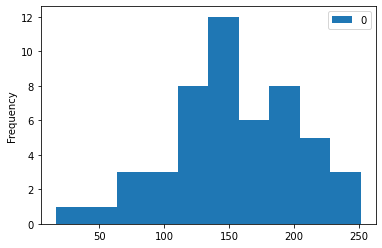

In [18]:
#histogram
pd.DataFrame(olcumler).plot.hist();

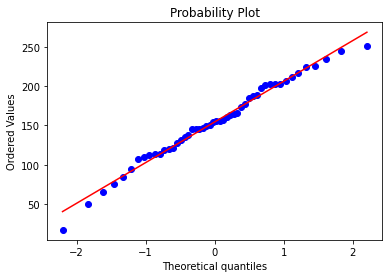

In [19]:
#qqplot
import pylab
stats.probplot(olcumler,dist="norm",plot=pylab)
pylab.show()

In [20]:
#shapiro-wilks testi    /////#varsayım kontrolü

In [21]:
from scipy.stats import shapiro

In [22]:
shapiro(olcumler) #pvalue degeri 0.05 den büyük oldugu için H0 reddedilemez 

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [24]:
#tek örneklem t testi UYGULAMASI

In [26]:
stats.ttest_1samp(olcumler , popmean=170) # pvalue degeri 0.05den küçük oldugu için H0 reddedilir yani 
                                          #web sitesinde geçirilen süre 170 saniye değildir

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [27]:
#nonparametrik tek örneklem testi

In [28]:
from statsmodels.stats.descriptivestats import sign_test

In [29]:
sign_test(olcumler,170)

(-7.0, 0.06490864707227219)

In [30]:
#tek örneklem oran testi

In [31]:
from statsmodels.stats.proportion import proportions_ztest

In [32]:
count=40        #500 kişiden 40 kişi dönüş yapmıs
nobs=500     
value=0.125     #dönusum oranı 0.125

In [33]:
proportions_ztest(count,nobs,value)   #H0 0.05 den küçük oldugu için reddedilir yani dönusum oranı 0.125 degildir

(-3.7090151628513017, 0.0002080669689845979)

In [34]:
#bagımsız iki örneklem t testi

In [45]:
A=pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,23,24,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B=pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
A_B=pd.concat([A,B] , axis=1)
A_B.columns= ["A","B"]
A_B.head()


0    30
dtype: int64

In [46]:
# A ve A nın grubu
GRUP_A=np.arange(len(A))
GRUP_A=pd.DataFrame(GRUP_A)
GRUP_A[:]="A"
A = pd.concat([A,GRUP_A],axis=1)

#B Ve B nin grubu
GRUP_B=np.arange(len(B))
GRUP_B=pd.DataFrame(GRUP_B)
GRUP_B[:]="B"
B = pd.concat([B,GRUP_B],axis=1)

#tüm veri
AB = pd.concat([A,B])
AB.columns=["GELİR","GRUP"]
print(AB.head())
print(AB.tail())

   GELİR GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    GELİR GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


In [47]:
import seaborn as sns

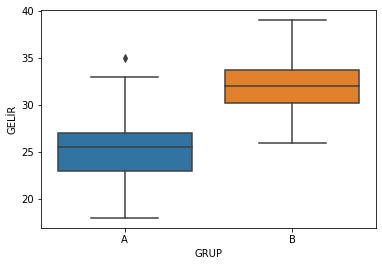

In [50]:
sns.boxplot(x="GRUP",y="GELİR",data=AB);

In [51]:
shapiro(A_B.A)  #normallık varsayımı H0 hipotezi=örnek dağılımı ile teorik normal dağılım arasında fark yoktur diyor
                #H1 fark vardır diyor
                # p value degeri 0.05den büyük olduğu için reddemiyoruz buyuzden , 
                #örnek dağılımı ile teorik normal dağılım arasında fark yoktur

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [52]:
shapiro(A_B.B)   #normallık varsayımı H0 hipotezi=örnek dağılımı ile teorik normal dağılım arasında fark yoktur diyor
                #H1 fark vardır diyor
                # p value degeri 0.05den büyük olduğu için reddemiyoruz buyuzden , 
                #örnek dağılımı ile teorik normal dağılım arasında fark yoktur

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

In [53]:
# varyans homojenliği varsayımı

H0:Varyanslar homojendir

H1:Varyanslar homojen değildir

In [55]:
stats.levene(A_B.A,A_B.B)   #p value değeri büyük oldugu için reddedilemez buyuzden homojendir

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [ ]:
#bagımsız iki örneklem t testi (hipotez testi)

In [56]:
stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)  #pvalue degeri 0.05den küçük oldugu için reddedilir yani m1=m2 değildir

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [59]:
test_istatistigi, pvalue=stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)      
print("Test istatistiği = %.4f , pdegeri=%.4f" % (test_istatistigi, pvalue))

Test istatistiği = -7.0287 , pdegeri=0.0000


In [60]:
#nonparametrik bagımsız iki örneklem testi

In [ ]:
#eğer normallik varsayımı ve hipotez testi sağlamasaydı nınparametrik ile yaparız

In [62]:
stats.mannwhitneyu(A_B["A"],A_B["B"])  #pvalue degeri küçüktür

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [65]:
test_istatistigi, pvalue=stats.mannwhitneyu(A_B["A"],A_B["B"])      
print("Test istatistiği = %.4f , pdegeri=%.4f" % (test_istatistigi, pvalue))

Test istatistiği = 89.5000 , pdegeri=0.0000
